# Kinetic Model Coefficient Analysis

Marc Pérez  
May 22, 2025

In [ ]:
#| include: false
#| message: false
#| warning: false

library(multcomp)

Loading required package: mvtnorm

Loading required package: survival

Loading required package: TH.data

Loading required package: MASS


Attaching package: 'TH.data'

The following object is masked from 'package:MASS':

    geyser

Loading required package: carData

Loading required package: Matrix


Attaching package: 'Matrix'

The following objects are masked from 'package:tidyr':

    expand, pack, unpack

Loading required package: ggpp

Registered S3 methods overwritten by 'ggpp':
  method                  from   
  heightDetails.titleGrob ggplot2
  widthDetails.titleGrob  ggplot2


Attaching package: 'ggpp'

The following object is masked from 'package:ggplot2':

    annotate


Attaching package: 'nlme'

The following object is masked from 'package:lme4':

    lmList


Attaching package: 'dplyr'

The following object is masked from 'package:kableExtra':

    group_rows

The following object is masked from 'package:nlme':

    collapse

The following object is masked from 'package:car':

    recode

The following object is masked from 'package:MASS':

    select

The following objects are masked from 'package:stats':

    filter, lag

The following objects are masked from 'package:base':

    intersect, setdiff, setequal, union

Model Agroscope $$Y_{rel}\sim A*(1-e^{rate*P_{CO_2}+Env})$$

Wir ersetzen nur rate mit unserer Schätzung k: $$Y_{rel}\sim A*(1-e^{k*P_{CO_2}+Env})$$

Sind unsere Modelparameter gute Prediktoren?? $$Y_{rel}\sim A*(1-e^{k*PS}+Env})$$

Es gibt noch die Kovariaten Niederschlag pro Jahr, Jahresdurchschnittstemperatur und Temperatur in Jugendphase

Registered S3 method overwritten by 'GGally':
  method from   
  +.gg   ggplot2

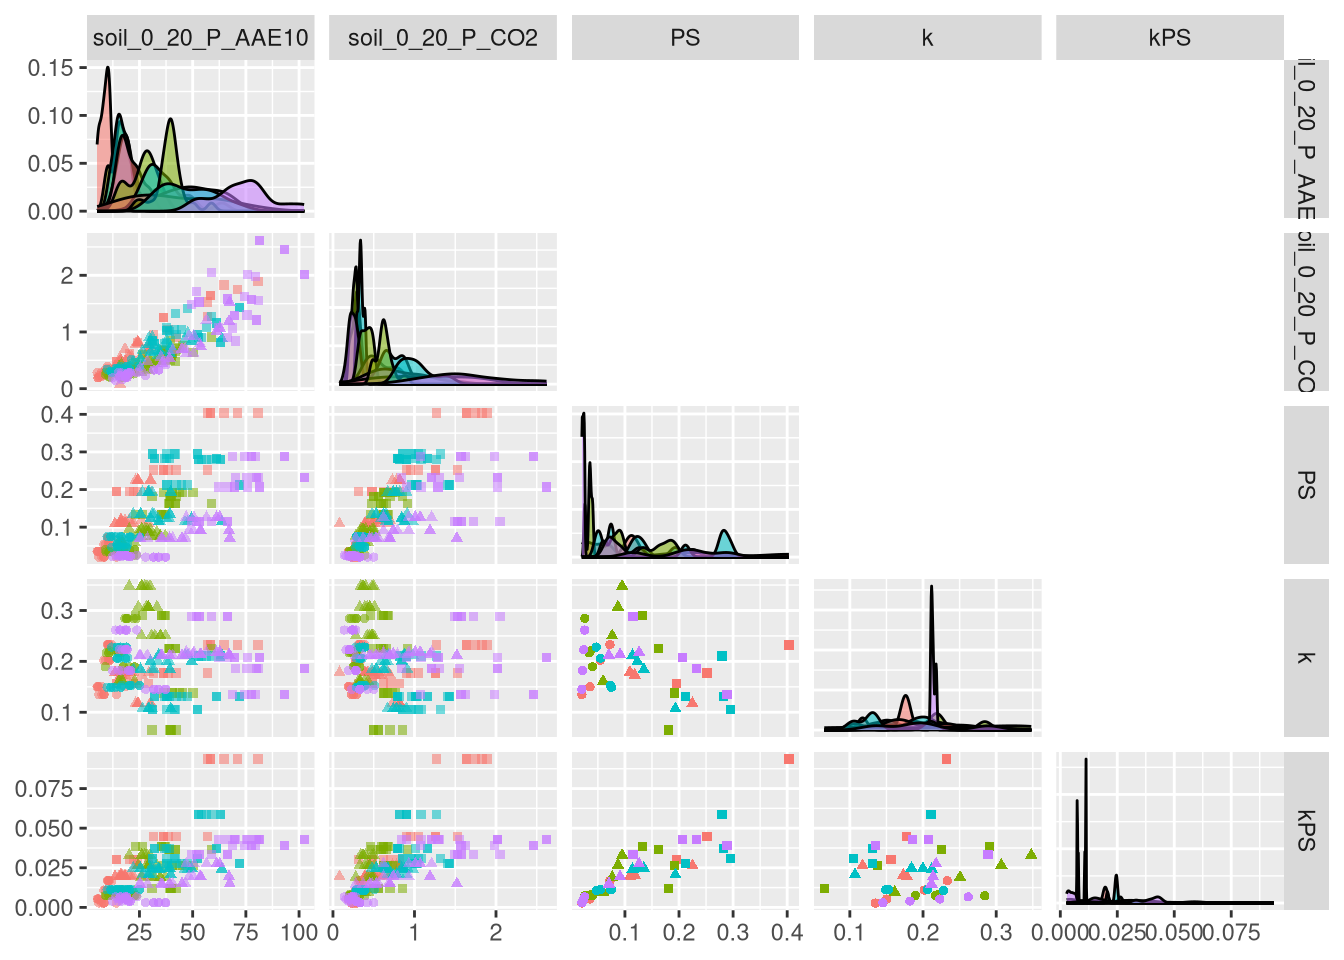

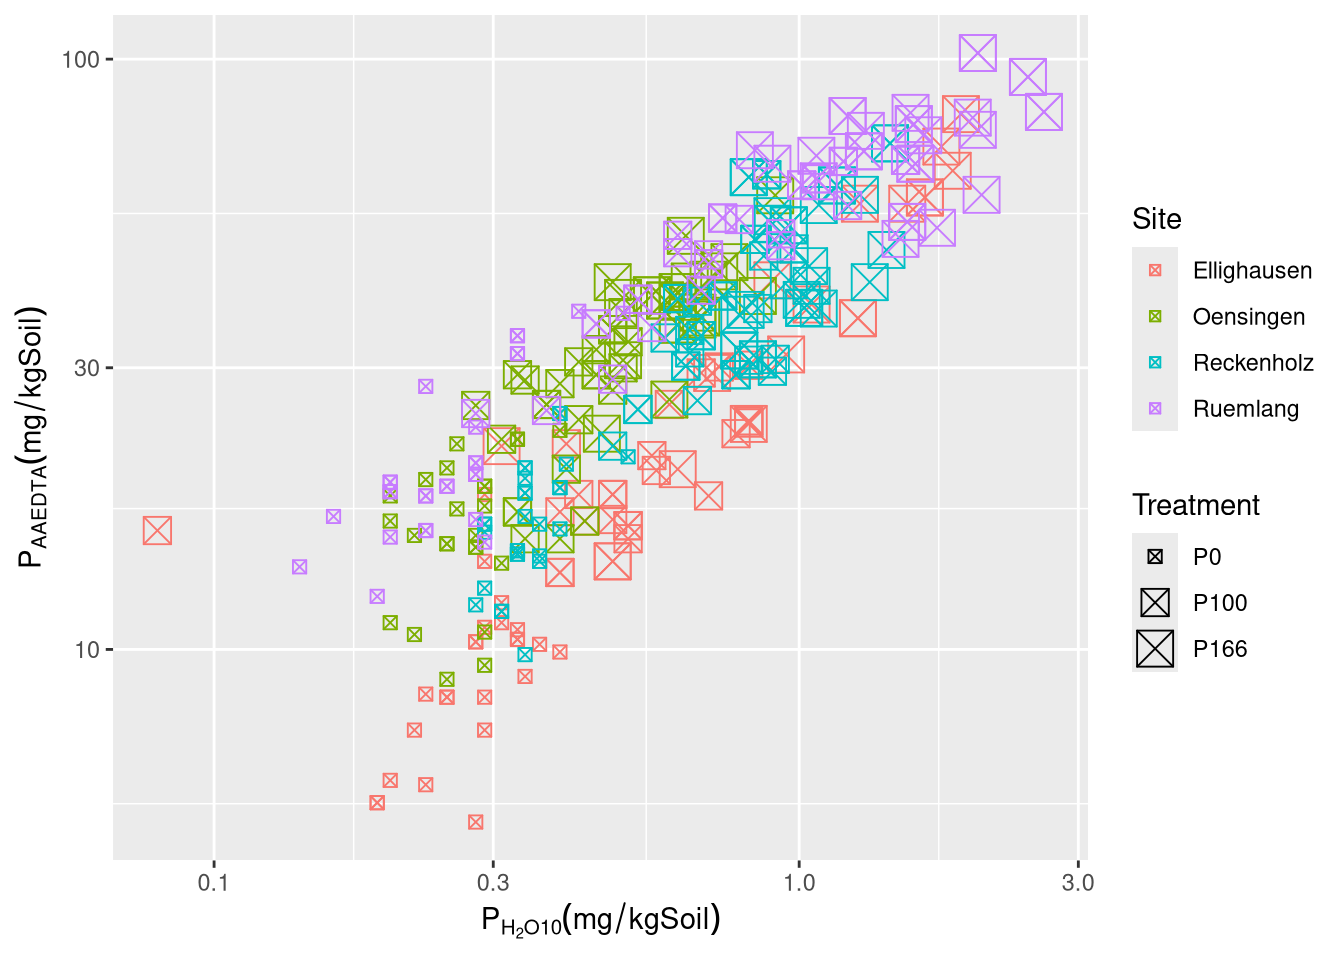

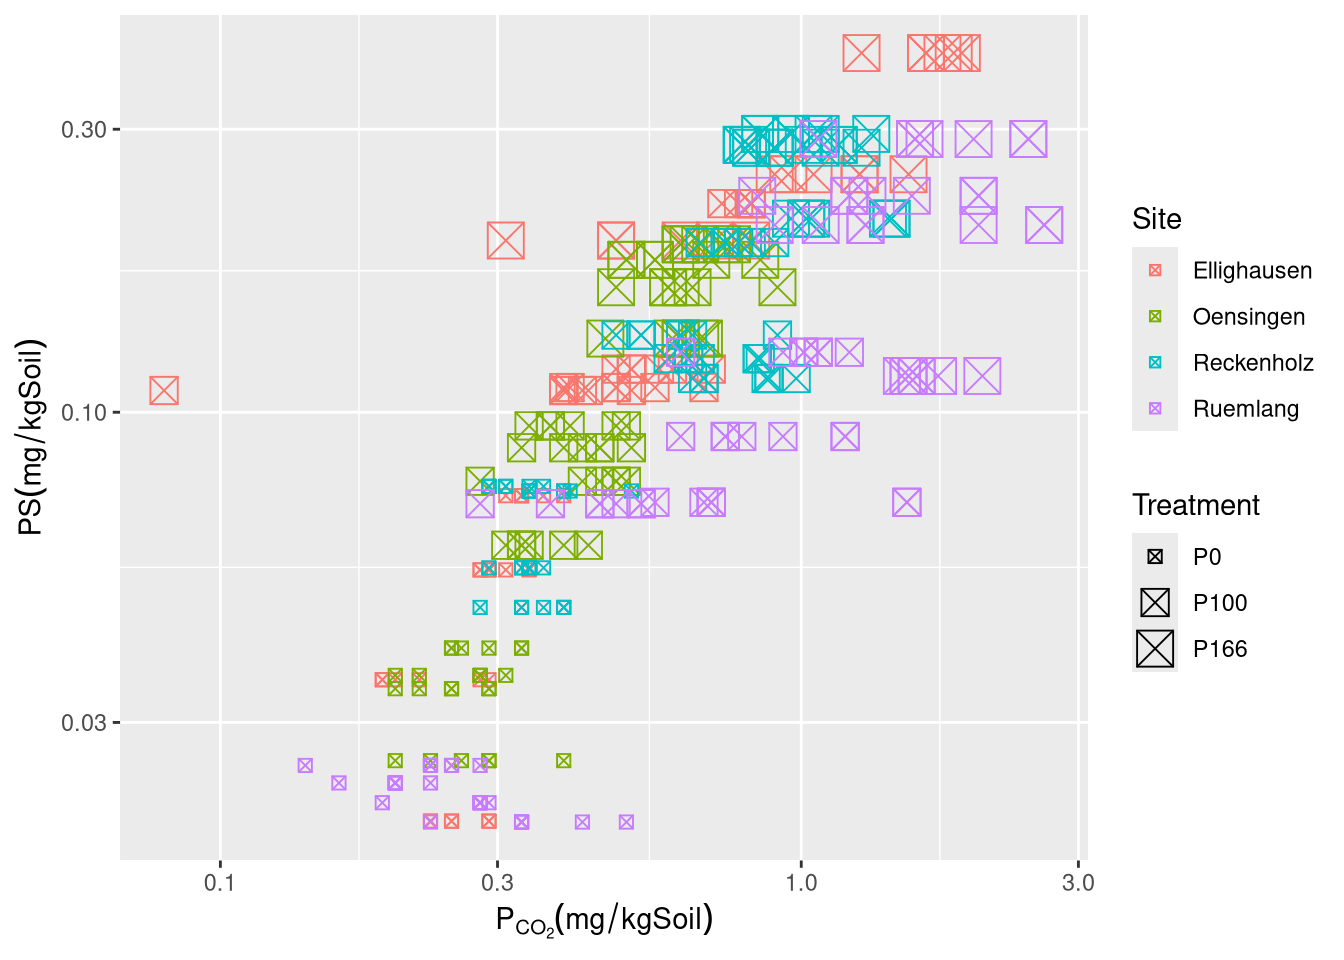

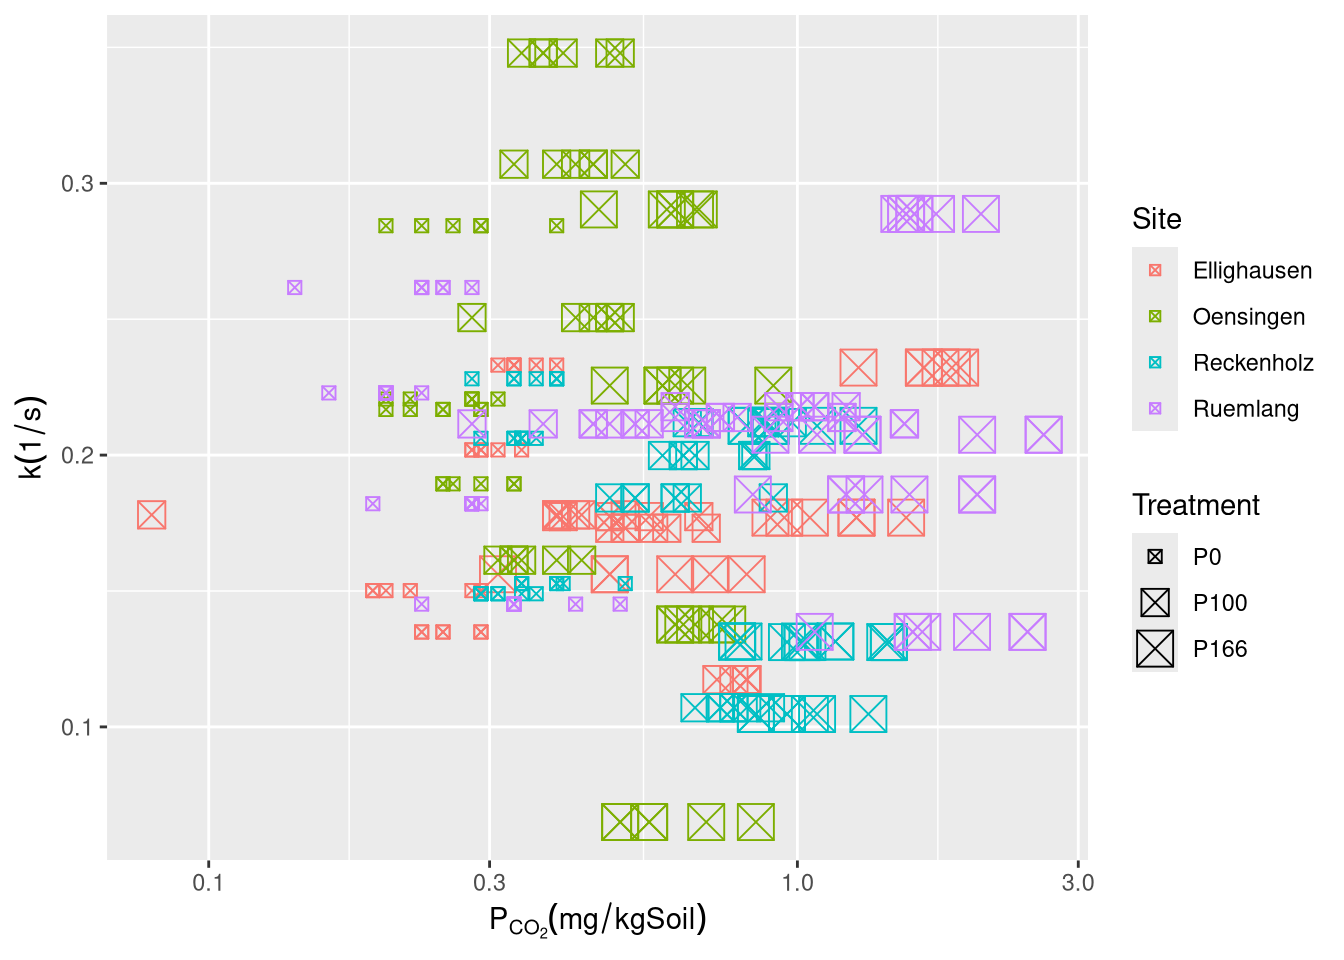

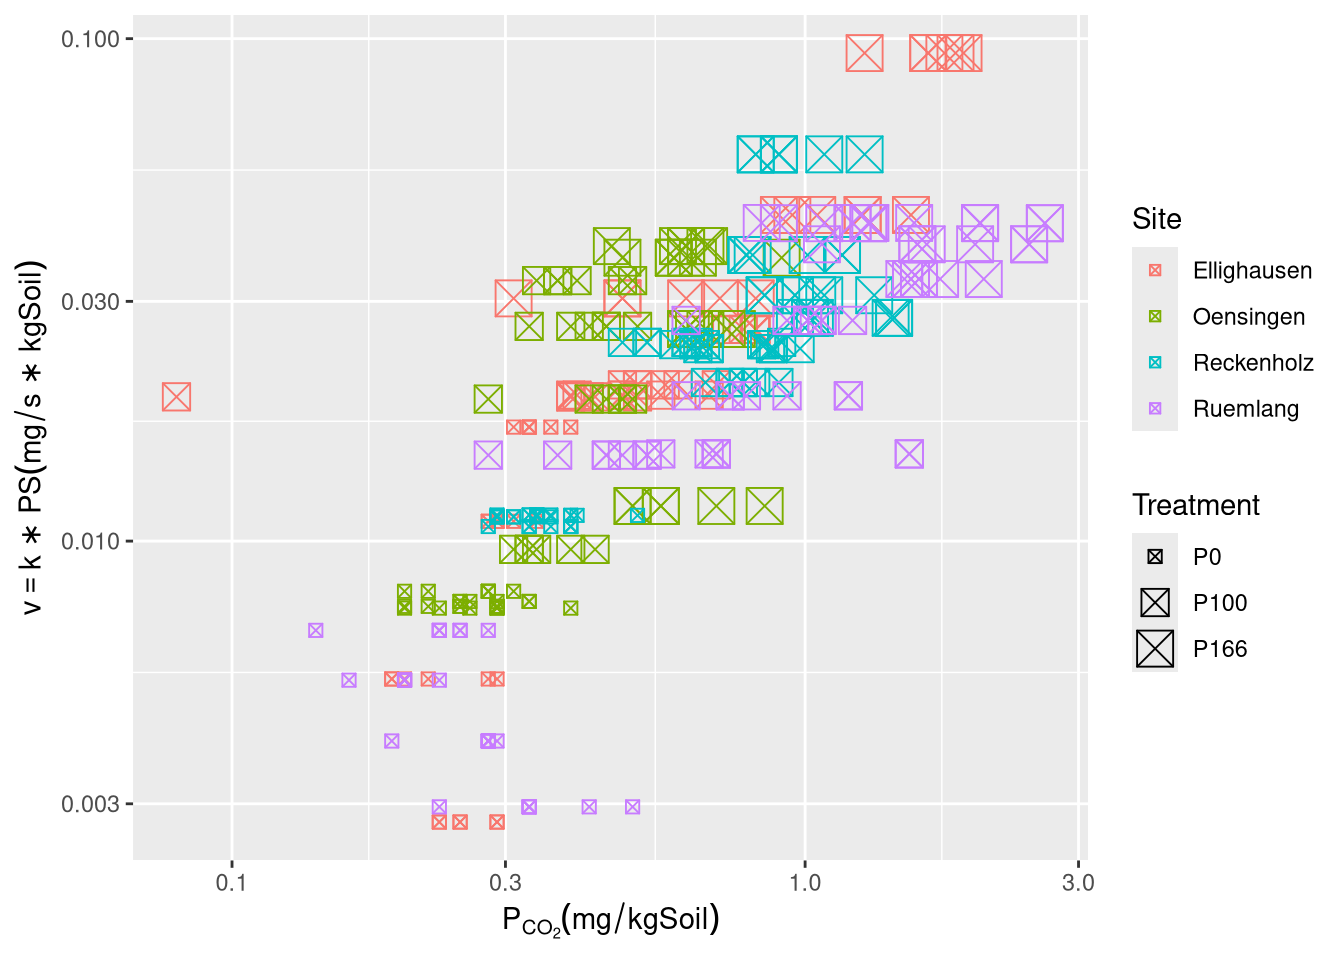

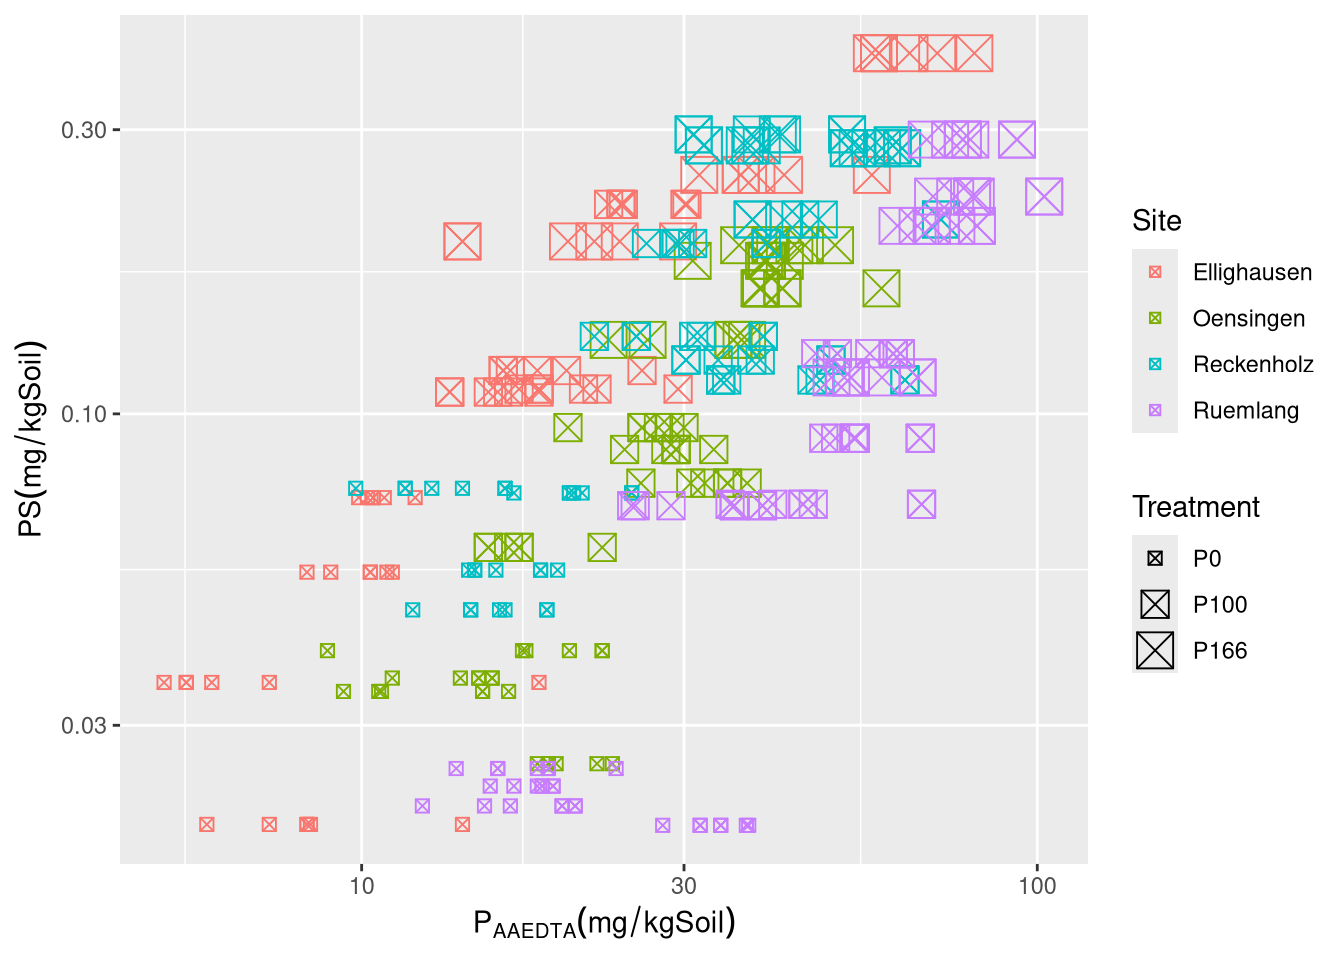

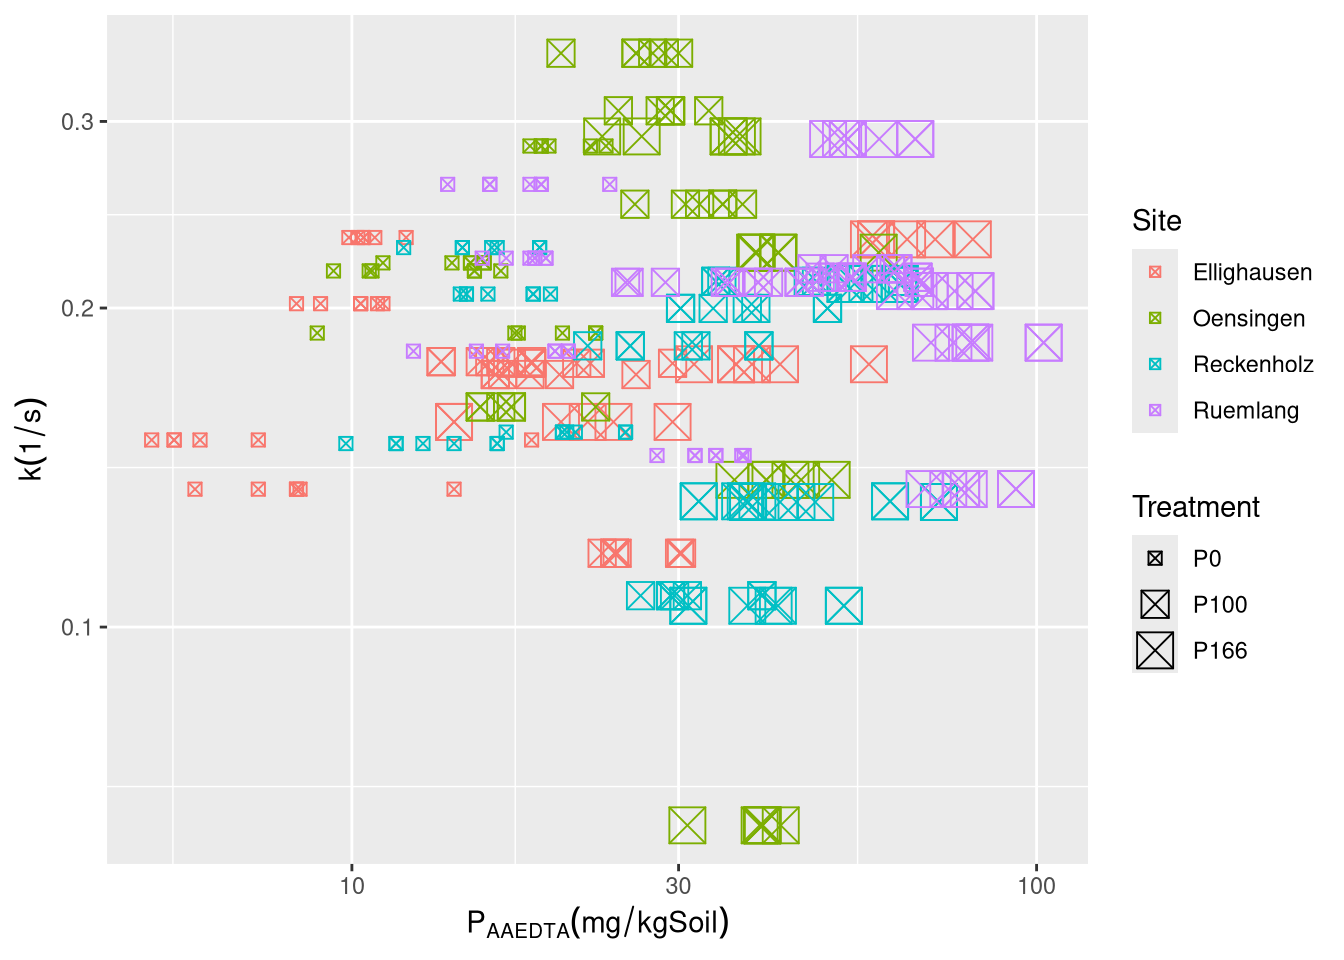

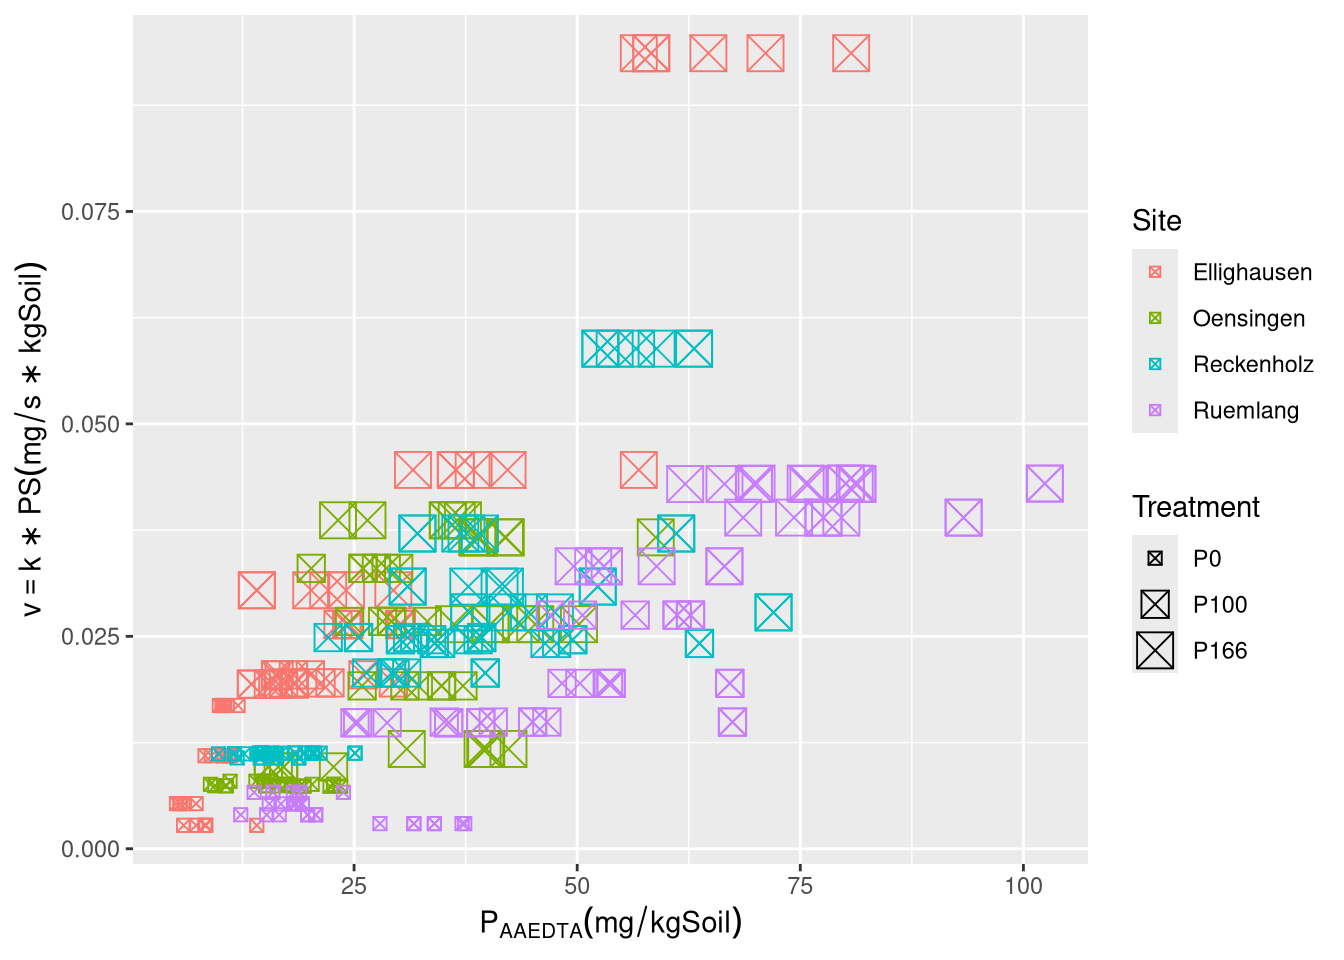

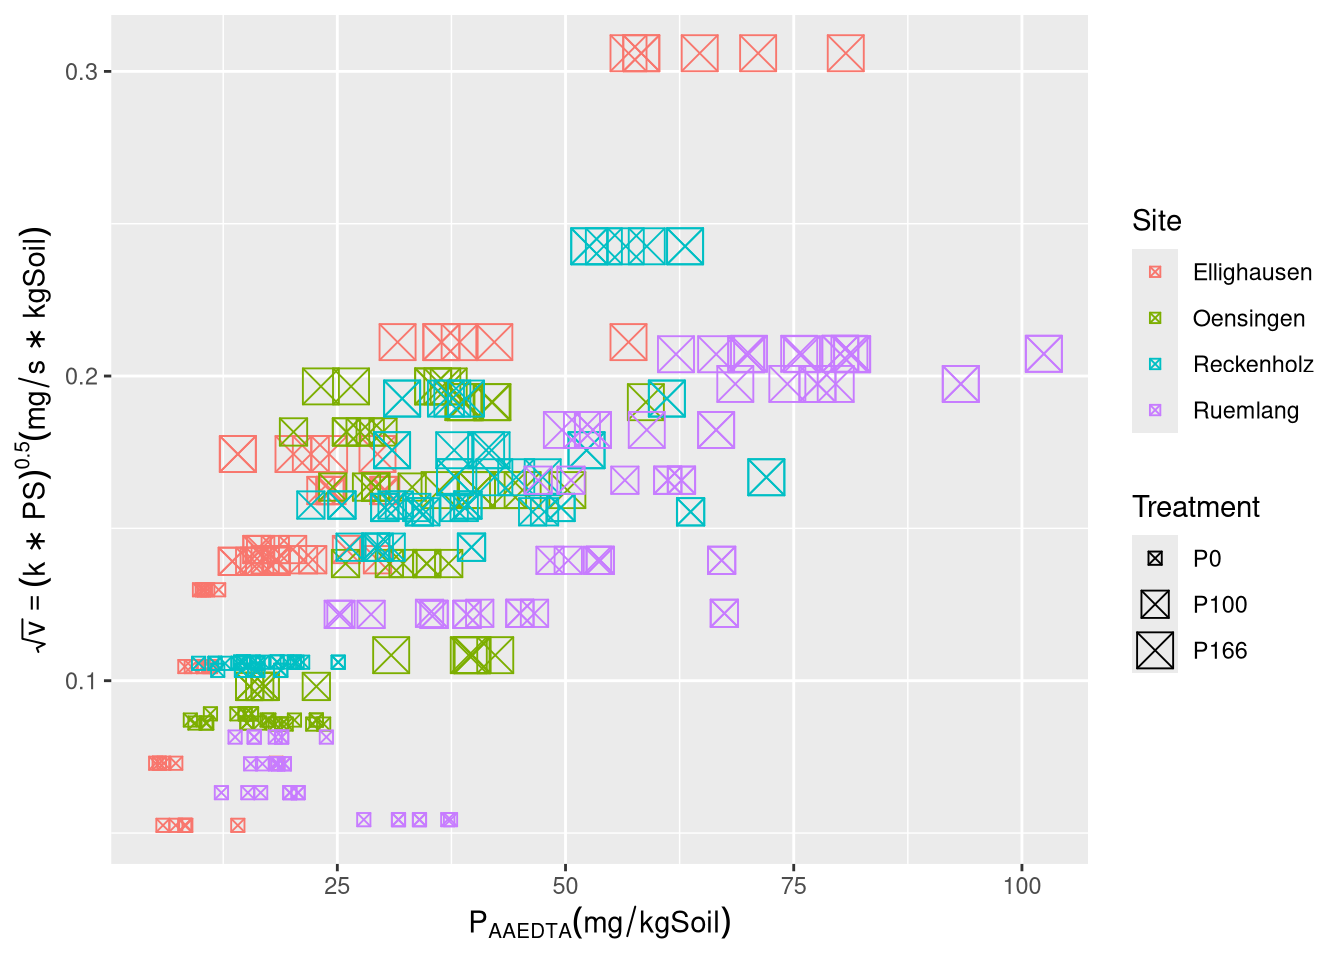

In [ ]:
#| echo: false

library(GGally)

Nun noch die Linearen Regressionen, die ausstehend sind:

`(1|year) + (1|Site)  + (1|Site:block) + (Treatment|Site)`

Random intercept per year and site, block nested in site. and Treatment nested in site (could also be modelled as a random slope to allow for correlations)

In [ ]:
# Wovon hängen Modelparameter ab?

library(lmerTest)


Attaching package: 'lmerTest'

The following object is masked from 'package:lme4':

    lmer

The following object is masked from 'package:stats':

    step

boundary (singular) fit: see help('isSingular')

boundary (singular) fit: see help('isSingular')

boundary (singular) fit: see help('isSingular')

boundary (singular) fit: see help('isSingular')

boundary (singular) fit: see help('isSingular')

boundary (singular) fit: see help('isSingular')

Type III Analysis of Variance Table with Satterthwaite's method
                  Sum Sq Mean Sq NumDF  DenDF  F value    Pr(>F)    
soil_0_20_clay    0.0719  0.0719     1 70.835   2.3900 0.1265690    
soil_0_20_pH_H2O  0.0152  0.0152     1 89.035   0.5061 0.4787086    
soil_0_20_Corg    0.4704  0.4704     1 65.081  15.6423 0.0001915 ***
soil_0_20_silt    0.1061  0.1061     1 70.745   3.5286 0.0644392 .  
Treatment        10.0459  5.0230     2  6.055 167.0386 5.047e-06 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Type III Analysis of Variance Table with Satterthwaite's method
                    Sum Sq   Mean Sq NumDF   DenDF F value   Pr(>F)   
soil_0_20_clay   0.0098145 0.0098145     1  69.315 10.0430 0.002276 **
soil_0_20_pH_H2O 0.0091421 0.0091421     1 102.384  9.3550 0.002838 **
soil_0_20_Corg   0.0014112 0.0014112     1  98.359  1.4441 0.232367   
soil_0_20_silt   0.0046704 0.0046704     1  75.912  4.7792 0.031889 * 
Treatment        0.0059045 0.0029522     2   5.405  3.0210 0.131603   
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1


     Simultaneous Tests for General Linear Hypotheses

Fit: lmer(formula = k ~ soil_0_20_clay + soil_0_20_pH_H2O + soil_0_20_Corg + 
    soil_0_20_silt + Treatment + (1 | year) + (1 | Site) + (1 | 
    Site:block) + (1 | Site:Treatment), data = D)

Linear Hypotheses:
                       Estimate Std. Error z value Pr(>|z|)  
(Intercept) == 0       0.074173   0.150771   0.492   0.9965  
soil_0_20_clay == 0   -0.007001   0.002209  -3.169   0.0101 *
soil_0_20_pH_H2O == 0  0.033719   0.011024   3.059   0.0151 *
soil_0_20_Corg == 0   -0.034534   0.028737  -1.202   0.7770  
soil_0_20_silt == 0    0.005864   0.002683   2.186   0.1651  
TreatmentP100 == 0     0.003910   0.015506   0.252   0.9999  
TreatmentP166 == 0    -0.031147   0.015685  -1.986   0.2527  
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1
(Adjusted p values reported -- single-step method)

Type III Analysis of Variance Table with Satterthwaite's method
                 Sum Sq Mean Sq NumDF   DenDF F value    Pr(>F)    
soil_0_20_clay   0.0055 0.00551     1  77.626  0.1042 0.7476732    
soil_0_20_pH_H2O 0.3773 0.37730     1 101.942  7.1334 0.0088083 ** 
soil_0_20_Corg   0.0105 0.01052     1  93.639  0.1989 0.6566047    
soil_0_20_silt   0.0036 0.00360     1  80.227  0.0681 0.7947202    
Treatment        4.0335 2.01676     2   5.846 38.1292 0.0004424 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1


     Simultaneous Tests for General Linear Hypotheses

Fit: lmer(formula = I(log(k * PS)) ~ soil_0_20_clay + soil_0_20_pH_H2O + 
    soil_0_20_Corg + soil_0_20_silt + Treatment + (1 | year) + 
    (1 | Site) + (1 | Site:block) + (1 | Site:Treatment), data = D)

Linear Hypotheses:
                       Estimate Std. Error z value Pr(>|z|)    
(Intercept) == 0      -6.657571   1.107385  -6.012   <0.001 ***
soil_0_20_clay == 0   -0.005315   0.016463  -0.323   0.9997    
soil_0_20_pH_H2O == 0  0.216350   0.081005   2.671   0.0478 *  
soil_0_20_Corg == 0    0.094682   0.212278   0.446   0.9980    
soil_0_20_silt == 0    0.005221   0.020000   0.261   0.9999    
TreatmentP100 == 0     1.064947   0.189197   5.629   <0.001 ***
TreatmentP166 == 0     1.634290   0.190059   8.599   <0.001 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1
(Adjusted p values reported -- single-step method)

Type III Analysis of Variance Table with Satterthwaite's method
          Sum Sq Mean Sq NumDF   DenDF F value Pr(>F)
k         352.08  352.08     1 100.895  1.5215 0.2203
log(PS)    35.78   35.78     1 141.012  0.1546 0.6948
Treatment 417.84  208.92     2   7.638  0.9028 0.4447
k:log(PS) 566.74  566.74     1 118.424  2.4491 0.1203

Type III Analysis of Variance Table with Satterthwaite's method
          Sum Sq Mean Sq NumDF  DenDF F value Pr(>F)
k          0.030   0.030     1 295.84  0.0002 0.9880
log(PS)   19.355  19.355     1 295.59  0.1456 0.7030
Treatment 77.444  38.722     2 257.88  0.2913 0.7475
k:log(PS)  1.344   1.344     1 295.03  0.0101 0.9200

Type III Analysis of Variance Table with Satterthwaite's method
                 Sum Sq Mean Sq NumDF  DenDF F value    Pr(>F)    
soil_0_20_clay   0.0118 0.01181     1 48.798  0.1428 0.7071250    
soil_0_20_pH_H2O 0.0686 0.06858     1 65.341  0.8297 0.3657041    
soil_0_20_Corg   0.2993 0.29934     1 37.017  3.6216 0.0648334 .  
soil_0_20_silt   0.0665 0.06645     1 22.514  0.8040 0.3793909    
Treatment        4.8977 2.44886     2  5.827 29.6281 0.0008839 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Type III Analysis of Variance Table with Satterthwaite's method
                 Sum Sq Mean Sq NumDF  DenDF F value    Pr(>F)    
soil_0_20_clay   0.0491  0.0491     1 58.650  1.1361 0.2908517    
soil_0_20_pH_H2O 0.2473  0.2473     1 75.287  5.7214 0.0192552 *  
soil_0_20_Corg   0.2830  0.2830     1 45.764  6.5490 0.0138669 *  
soil_0_20_silt   0.0572  0.0572     1 87.560  1.3231 0.2531704    
Treatment        7.5352  3.7676     2  4.841 87.1720 0.0001598 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Since we now model two measurement methods, we do not expect correlations by Site/year/etc

boundary (singular) fit: see help('isSingular')

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
   0.00    0.00   18.50   17.75   26.37   85.57 

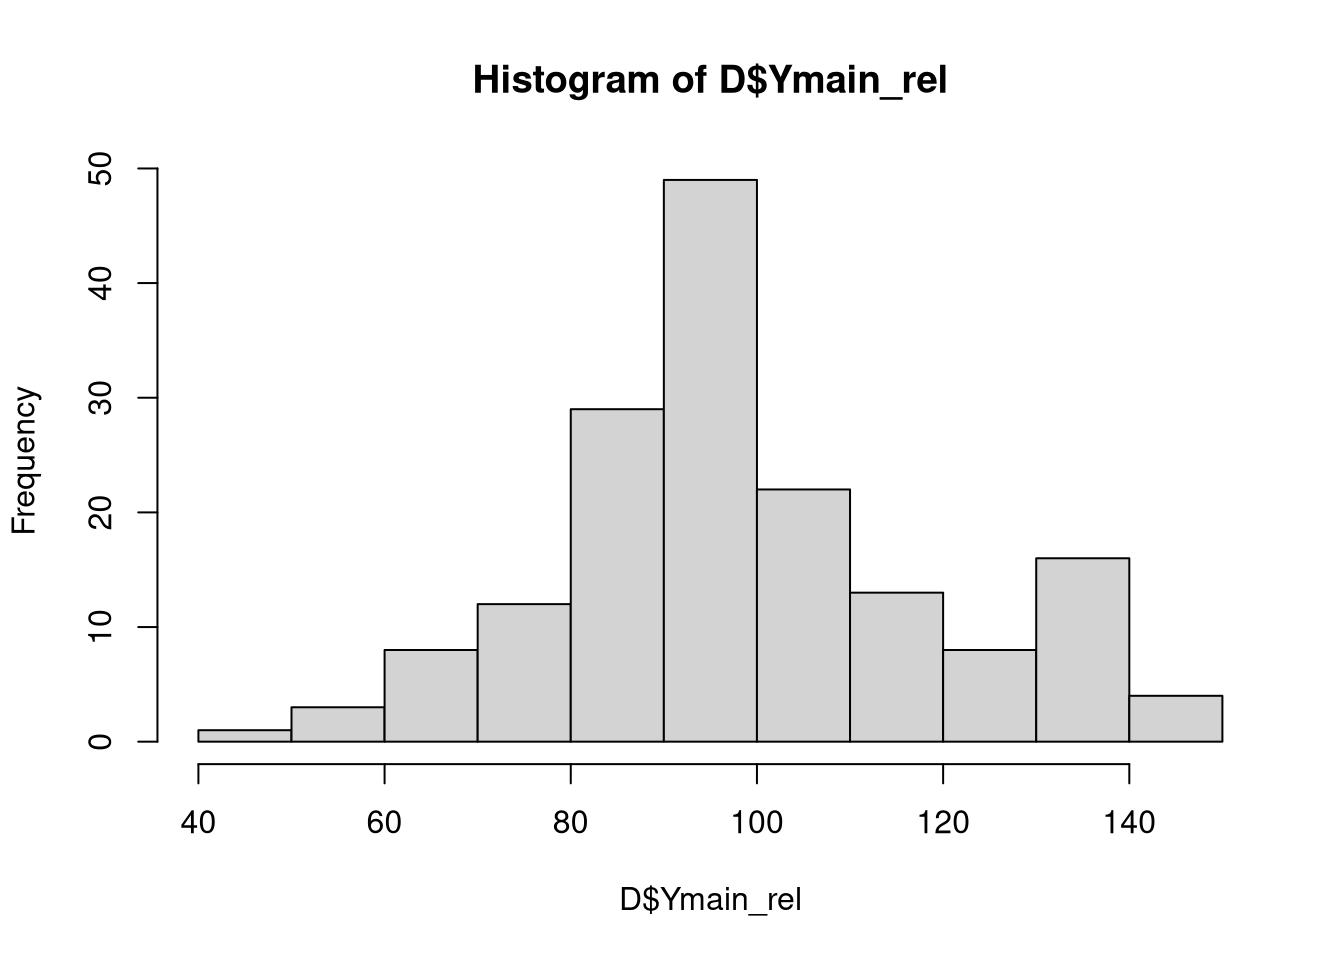

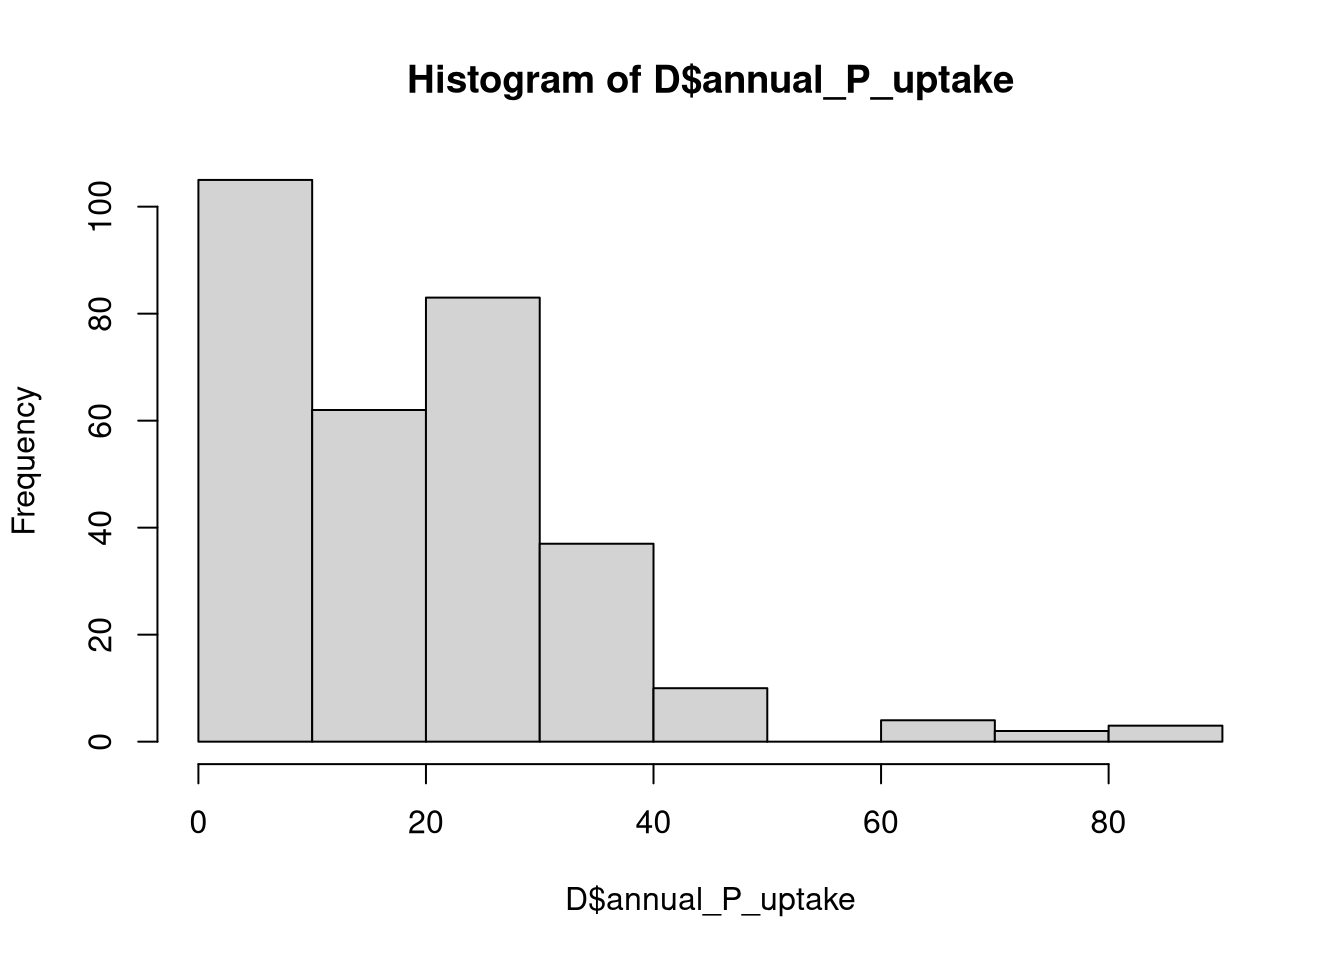


     Simultaneous Tests for General Linear Hypotheses

Fit: lm(formula = log(PS) ~ log(soil_0_20_P_CO2) + log(soil_0_20_P_AAE10), 
    data = D)

Linear Hypotheses:
                            Estimate Std. Error t value Pr(>|t|)    
(Intercept) == 0            -1.28442    0.31706  -4.051   <0.001 ***
log(soil_0_20_P_CO2) == 0    1.13024    0.08056  14.030   <0.001 ***
log(soil_0_20_P_AAE10) == 0 -0.12003    0.08208  -1.462    0.208    
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1
(Adjusted p values reported -- single-step method)


     Simultaneous Tests for General Linear Hypotheses

Fit: lm(formula = k ~ log(soil_0_20_P_CO2) + log(soil_0_20_P_AAE10), 
    data = D)

Linear Hypotheses:
                             Estimate Std. Error t value Pr(>|t|)    
(Intercept) == 0             0.042082   0.035874   1.173    0.334    
log(soil_0_20_P_CO2) == 0   -0.043350   0.009115  -4.756   <0.001 ***
log(soil_0_20_P_AAE10) == 0  0.037654   0.009287   4.055   <0.001 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1
(Adjusted p values reported -- single-step method)


     Simultaneous Tests for General Linear Hypotheses

Fit: lm(formula = I(log(k * PS)) ~ log(soil_0_20_P_CO2) + log(soil_0_20_P_AAE10), 
    data = D)

Linear Hypotheses:
                            Estimate Std. Error t value Pr(>|t|)    
(Intercept) == 0            -3.71276    0.32286 -11.500   <0.001 ***
log(soil_0_20_P_CO2) == 0    0.90642    0.08203  11.050   <0.001 ***
log(soil_0_20_P_AAE10) == 0  0.06226    0.08358   0.745    0.596    
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1
(Adjusted p values reported -- single-step method)

Linear mixed model fit by REML. t-tests use Satterthwaite's method [
lmerModLmerTest]
Formula: 
Ymain_rel ~ log(soil_0_20_P_CO2) + log(soil_0_20_P_AAE10) + Treatment +  
    (1 | year) + (1 | Site) + (1 | Site:block) + (1 | Site:Treatment)
   Data: D

REML criterion at convergence: 1356.3

Scaled residuals: 
     Min       1Q   Median       3Q      Max 
-2.89707 -0.51631 -0.01278  0.59920  2.76693 

Random effects:
 Groups         Name        Variance  Std.Dev. 
 Site:block     (Intercept) 1.088e-06  0.001043
 Site:Treatment (Intercept) 7.770e+00  2.787480
 Site           (Intercept) 3.888e+01  6.235037
 year           (Intercept) 2.299e+02 15.163045
 Residual                   2.235e+02 14.950651
Number of obs: 165, groups:  
Site:block, 16; Site:Treatment, 12; Site, 4; year, 4

Fixed effects:
                       Estimate Std. Error     df t value Pr(>|t|)    
(Intercept)              78.918     20.173 58.997   3.912 0.000239 ***
log(soil_0_20_P_CO2)      5.289      4.490 94.580   

In [ ]:
# fit.PS       <- lm(PS            ~ soil_0_20_P_CO2 + soil_0_20_P_AAE10, D)
fit.PS       <- lm(log(PS)         ~ log(soil_0_20_P_CO2) + log(soil_0_20_P_AAE10), D)
fit.k        <- lm(k               ~ log(soil_0_20_P_CO2) + log(soil_0_20_P_AAE10), D)
fit.kPS      <- lm(I(log(k*PS))    ~ log(soil_0_20_P_CO2) + log(soil_0_20_P_AAE10), D)

fit.Yrel     <- lmer(Ymain_rel       ~ log(soil_0_20_P_CO2) + log(soil_0_20_P_AAE10) + Treatment + (1|year) + (1|Site)  + (1|Site:block) + (1|Site:Treatment), D)